In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json

def json_read(filename):
    with open(filename, 'r') as f:
        return json.load(f)


In [10]:
class SiPM:
    def __init__(self, path:str):
        self.dict = json_read(path)
    
    def get_dict(self):
        return self.dict
    
    def get_smu_voltage(self):
        return self.dict['IVResult']["SMUVoltage"]
    
    def get_smu_current(self):
        return self.dict['IVResult']["SMUCurrent"]
    
    def get_dmm_voltage(self):
        return self.dict['IVResult']["DMMVoltage"]
    
    def get_dmm_current(self):
        return self.dict['IVResult']["DMMCurrent"]
    
    def get_resistance(self):
        return self.dict['DMMResistanceResult']["Resistance"]
    
    def get_temperature(self):
        return self.dict['Temperatures'][0]["ControlTemperature"]

In [11]:
sipm = SiPM("data/json/json/Data_00546_0.json")

Temperature: 28.484 C
Resistance: 9342263.176130798 Ohm


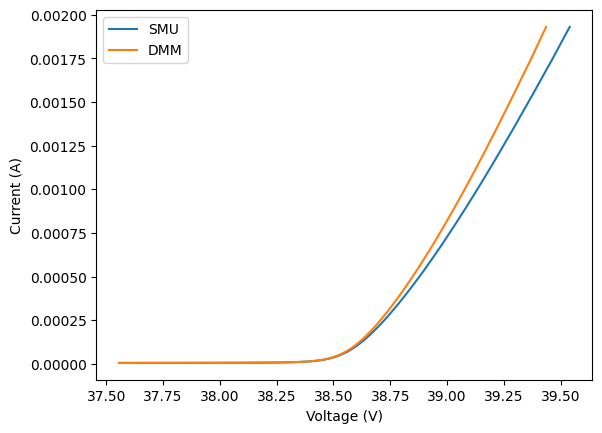

In [13]:
v_smu = sipm.get_smu_voltage()
i_smu = sipm.get_smu_current()
v_dmm = sipm.get_dmm_voltage()

temperature = sipm.get_temperature()
resistance = sipm.get_resistance()

print(f"Temperature: {temperature} C")
print(f"Resistance: {resistance} Ohm")

# i_dmm = sipm.get_dmm_current()

plt.plot(v_smu, i_smu, label="SMU")
plt.plot(v_dmm, i_smu, label="DMM")

plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.legend()
plt.show()

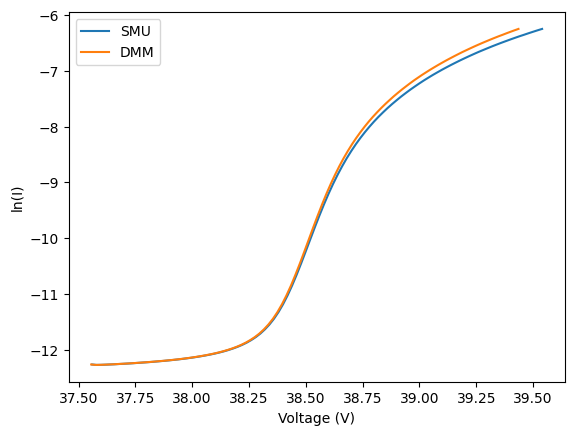

In [19]:
# v_smu_log = np.log(v_smu)
# v_dmm_log = np.log(v_dmm)
i_smu_log = np.log(i_smu)

plt.plot(v_smu, i_smu_log, label="SMU")
plt.plot(v_dmm, i_smu_log, label="DMM")

plt.xlabel("Voltage (V)")
plt.ylabel(r"ln(I)")
plt.legend()

Max current at 38.51999867329694 V


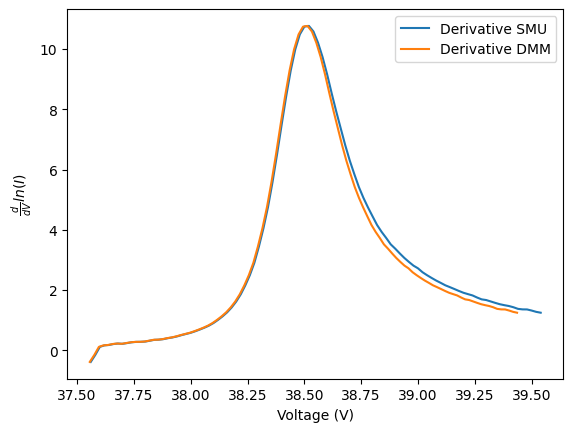

In [ ]:
i_smu_log_derivative = np.gradient(i_smu_log, v_smu)

i_max_index = np.argmax(i_smu_log_derivative)
print(f"Max current at {v_smu[i_max_index]} V")

plt.plot(v_smu, i_smu_log_derivative, label="Derivative SMU")
plt.plot(v_dmm, i_smu_log_derivative, label="Derivative DMM")

plt.xlabel("Voltage (V)")
plt.ylabel(r"$\frac{d}{dV} ln(I)$")

plt.legend()
plt.show()